In [1]:
import emcee
from scipy.optimize import minimize
import corner
import ptemcee
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from emukit.core import ParameterSpace, ContinuousParameter
from GPy.models import MultioutputGP
from GPy import likelihoods
from emukit.model_wrappers import GPyMultiOutputWrapper
from GPy.kern import RBF

### 1-dimensional input, 2-dimensional outputs

Define simple test functions: sine and cosine

In [2]:
def f(X): # add noise
    y1 = np.sin(X) + np.random.normal(size=1,loc=0,scale=0.1)
    y2 = np.cos(X) + np.random.normal(size=1,loc=0,scale=0.1)
    return [np.sin(X),np.cos(X)]

Generate initial design points

In [3]:
from emukit.core.initial_designs import RandomDesign

parameter_space = ParameterSpace([ContinuousParameter('x', 0, 1)])
design = RandomDesign(parameter_space)
num_data_points = 2
X = design.get_samples(num_data_points)
X = 8 * X - 4 # convert to [-4,4]

In [4]:
X

array([[-3.69404289],
       [ 3.53406914]])

In [5]:
Y = f(X)

In [6]:
kernel1 = RBF(input_dim=1)
kernel2 = RBF(input_dim=1)
model_gpy = MultioutputGP([X,X],Y,
                          likelihood_list=[likelihoods.Gaussian(),likelihoods.Gaussian()],
                          kernel_list=[kernel1,kernel2])
model_emukit = GPyMultiOutputWrapper(model_gpy, n_outputs=2, n_optimization_restarts=10)
model_emukit.optimize()

Optimization restart 1/10, f = 3.882307990154098
Optimization restart 2/10, f = 3.8823079899033637
Optimization restart 3/10, f = 3.882307990154206
Optimization restart 4/10, f = 3.8823079901561846
Optimization restart 5/10, f = 3.8823079901544535
Optimization restart 6/10, f = 3.88230809497347
Optimization restart 7/10, f = 3.8823079902416353
Optimization restart 8/10, f = 3.882307990285743
Optimization restart 9/10, f = 1.3787703539897391
Optimization restart 10/10, f = 3.8823079191428946


In [7]:
from emukit.experimental_design.acquisitions.contour_MultiObs import contourWeightedEI

Set target: true parameter = 0.5

In [8]:
a_list = [np.sin(0.5), np.cos(0.5)]
alpha_list = [2, 2]
w_list = [0.5, 0.5]

In [9]:
contour_MD = contourWeightedEI(modelwrapper = model_emukit, a_list = a_list, alpha_list = alpha_list, w_list = w_list)

In [10]:
from emukit.experimental_design import ExperimentalDesignLoop
expdesign_loop = ExperimentalDesignLoop(model = model_emukit,
                                         space = parameter_space,
                                         acquisition = contour_MD,
                                         batch_size = 1)

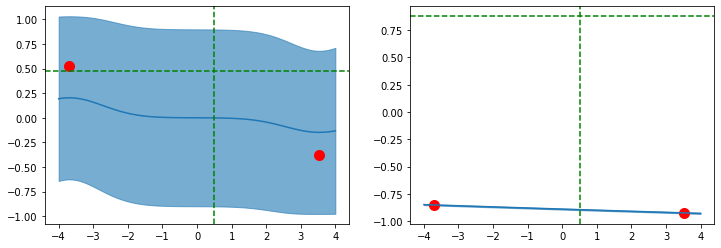

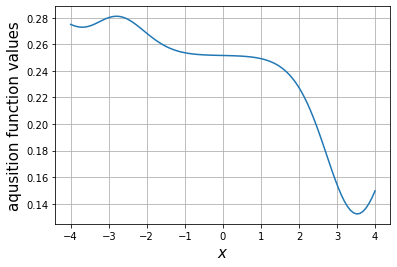

[[0.]]
Optimization restart 1/10, f = 4.9235055330865105
Optimization restart 2/10, f = 5.343231315490549
Optimization restart 3/10, f = 4.923505605225383
Optimization restart 4/10, f = 5.343231302773468
Optimization restart 5/10, f = 5.343231315579669
Optimization restart 6/10, f = 5.343231315490517
Optimization restart 7/10, f = 4.923506327827186
Optimization restart 8/10, f = 5.343231336748216
Optimization restart 9/10, f = 5.3432313154810664
Optimization restart 10/10, f = 5.343231336057503


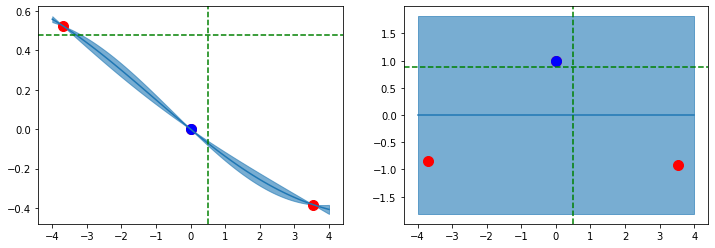

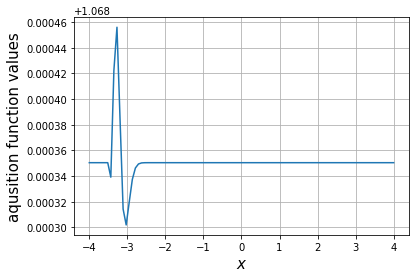

[[0.25494812]]
Optimization restart 1/10, f = 6.741840285591326
Optimization restart 2/10, f = 4.495633958248586
Optimization restart 3/10, f = 4.495633969572364
Optimization restart 4/10, f = 4.495633979368815
Optimization restart 5/10, f = 4.4956339273212365
Optimization restart 6/10, f = 4.495634031936455
Optimization restart 7/10, f = 4.4956339589233085
Optimization restart 8/10, f = 4.4956339348757774
Optimization restart 9/10, f = 4.46537669323746
Optimization restart 10/10, f = 4.4956339285923415


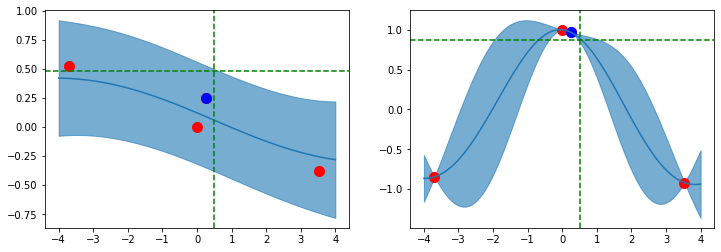

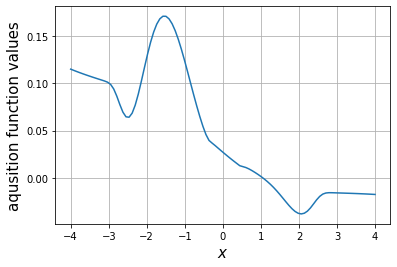

[[0.]]
Optimization restart 1/10, f = -3.9739089298804586
Optimization restart 2/10, f = -11.291928081034936
Optimization restart 3/10, f = -11.291928218631057
Optimization restart 4/10, f = -11.39402259896119
Optimization restart 5/10, f = -11.394022656621987
Optimization restart 6/10, f = -11.291928208397401
Optimization restart 7/10, f = -11.39402276513694
Optimization restart 8/10, f = -11.291928206379378
Optimization restart 9/10, f = -11.291928201816031
Optimization restart 10/10, f = -11.394022752589875


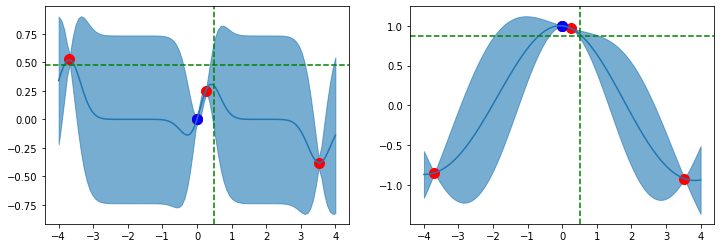

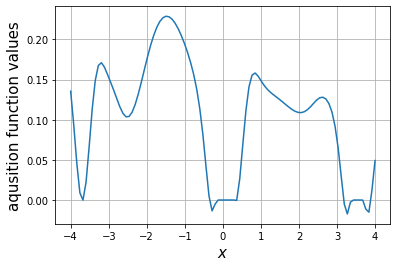

[[0.83031248]]
Optimization restart 1/10, f = -12.454410558742694
Optimization restart 2/10, f = -2.8194229866409515
Optimization restart 3/10, f = -12.454410581592
Optimization restart 4/10, f = -10.846348805356175
Optimization restart 5/10, f = -10.846348603384552
Optimization restart 6/10, f = -12.454410348353614
Optimization restart 7/10, f = -12.454410582248451
Optimization restart 8/10, f = -12.454410583702217
Optimization restart 9/10, f = -10.84634917358067
Optimization restart 10/10, f = -12.45441056269591


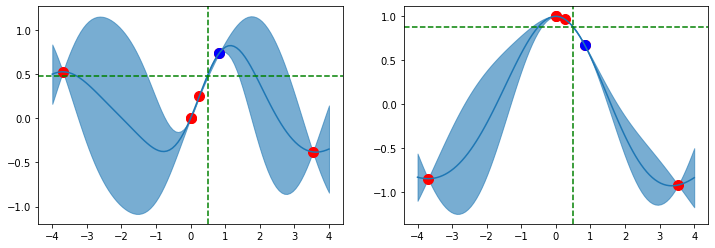

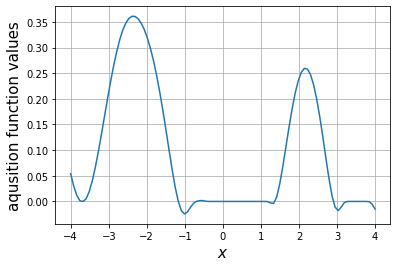

[[0.48528477]]
Optimization restart 1/10, f = -15.666319947882133
Optimization restart 2/10, f = -21.802299260627862
Optimization restart 3/10, f = -21.802280500115263
Optimization restart 4/10, f = -21.802299077873574
Optimization restart 5/10, f = -21.802262582047184
Optimization restart 6/10, f = -21.802242091064816
Optimization restart 7/10, f = -21.802298728400082
Optimization restart 8/10, f = -21.80229925251298
Optimization restart 9/10, f = -21.802295647899427
Optimization restart 10/10, f = -21.802299269296157


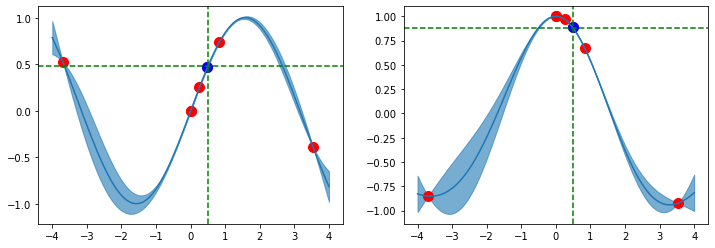

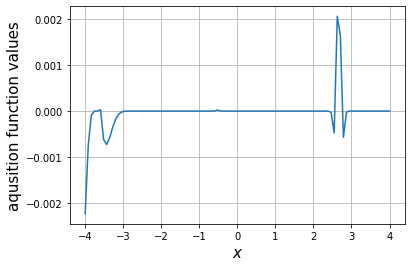

[[0.50224921]]
Optimization restart 1/10, f = -37.63630446269646
Optimization restart 2/10, f = -37.6363044410447
Optimization restart 3/10, f = -37.636303991010905
Optimization restart 4/10, f = -37.636304425413854
Optimization restart 5/10, f = -37.63630394522702
Optimization restart 6/10, f = -37.63630392074895
Optimization restart 7/10, f = -37.63628635855651
Optimization restart 8/10, f = -37.6363042739398
Optimization restart 9/10, f = -37.63630446079968
Optimization restart 10/10, f = -37.63625395866823


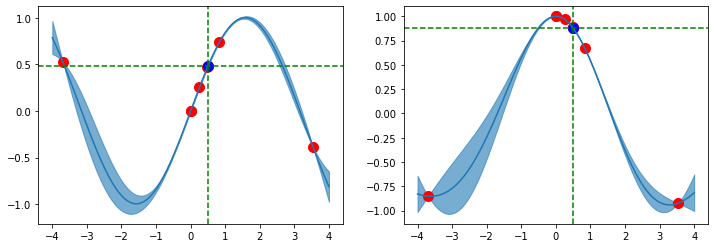

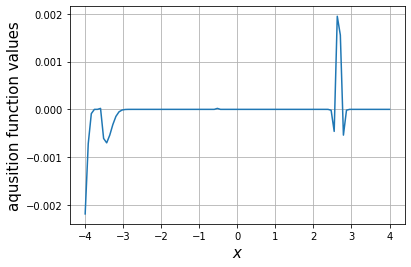

[[0.50170822]]
Optimization restart 1/10, f = -53.79704281635756
Optimization restart 2/10, f = -53.79704290857299
Optimization restart 3/10, f = -53.797042868112584
Optimization restart 4/10, f = -53.797042798909374
Optimization restart 5/10, f = -53.796969084816354
Optimization restart 6/10, f = -53.79704279547454
Optimization restart 7/10, f = -23.545813383463607
Optimization restart 8/10, f = -53.796886095809626
Optimization restart 9/10, f = -53.79689883159699
Optimization restart 10/10, f = -53.797041571603046


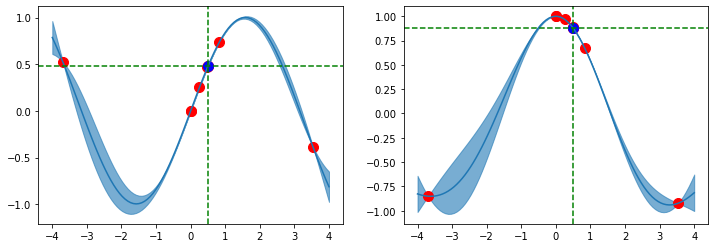

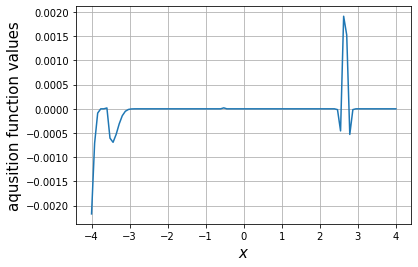

[[0.50149209]]
Optimization restart 1/10, f = -70.08434351510444
Optimization restart 2/10, f = -70.0843283146206
Optimization restart 3/10, f = -70.0843435414094
Optimization restart 4/10, f = -70.08434366646777
Optimization restart 5/10, f = -70.08434353042574
Optimization restart 6/10, f = -70.0843436106123
Optimization restart 7/10, f = -70.0843434722964
Optimization restart 8/10, f = -70.08427874992256
Optimization restart 9/10, f = -70.0843436061728
Optimization restart 10/10, f = -70.0843436356265


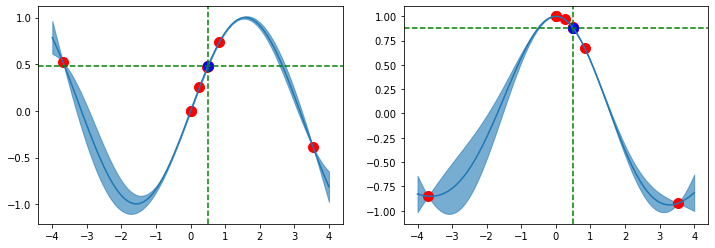

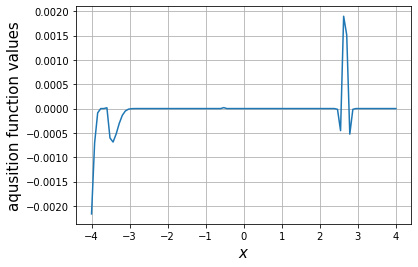

[[0.50185683]]
Optimization restart 1/10, f = -86.43883327814149
Optimization restart 2/10, f = -86.43883455160179
Optimization restart 3/10, f = -86.43883411782122
Optimization restart 4/10, f = -86.43883447960818
Optimization restart 5/10, f = -86.43878946581466
Optimization restart 6/10, f = -86.43883448030779
Optimization restart 7/10, f = -86.43883453573072
Optimization restart 8/10, f = -86.43883449215566
Optimization restart 9/10, f = -86.43883318302679
Optimization restart 10/10, f = -86.43883471161044


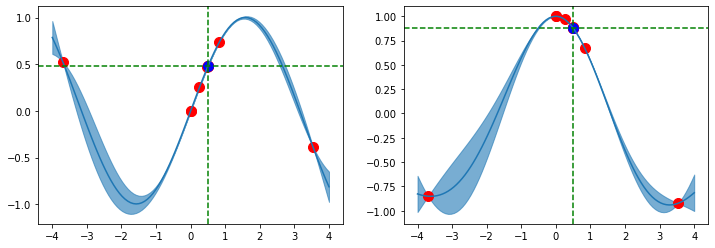

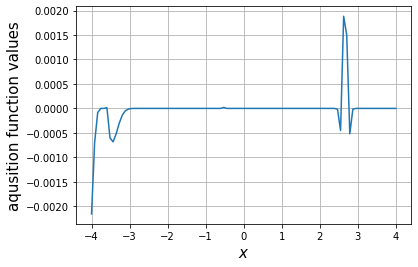

[[0.50157627]]
Optimization restart 1/10, f = -102.83620411821977
Optimization restart 2/10, f = -102.83583910177498
Optimization restart 3/10, f = -102.83620908382196
Optimization restart 4/10, f = -102.8362090163447
Optimization restart 5/10, f = -102.83620893983371
Optimization restart 6/10, f = -102.83620902442252
Optimization restart 7/10, f = -102.83620917193574
Optimization restart 8/10, f = -102.83620903058292
Optimization restart 9/10, f = -102.83620892916673
Optimization restart 10/10, f = -102.83620865707954


In [11]:
# with figures
max_iterations = 10
x_plot = np.linspace(-4, 4,100).reshape(-1,1)

for i in range(0,max_iterations):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    
    # first observable
    obsNo = 0
    new_column = [[obsNo]]*len(x_plot) # predict for ith emulator
    pred_temp = model_emukit.predict(np.append(x_plot,new_column,axis=1))
    m_vec = pred_temp[0] # vector of predictive means
    s2_vec = pred_temp[1] # vector of predictive variances
    
    x1_temp = model_emukit.X[model_emukit.X[:,1]==obsNo,0].reshape(-1,1)
    y1_temp = model_emukit.Y[obsNo*len(x1_temp):(obsNo+1)*len(x1_temp)]
    
    ax1.plot(x1_temp, y1_temp, "ro", markersize=10, label="Observations")
    if i > 0 :
        ax1.plot(xnew, f(xnew)[obsNo], "bo", markersize=10, label="Observations")
    ax1.plot(x_plot, m_vec, "C0", label="Model")
    ax1.fill_between(x_plot[:, 0],
                 m_vec[:, 0] + 1.96 * np.sqrt(s2_vec)[:, 0],
                 m_vec[:, 0] - 1.96 * np.sqrt(s2_vec)[:, 0], color="C0", alpha=0.6, label=r'1.96$\sigma$')
    ax1.axhline(y=a_list[obsNo], color='g', linestyle='--')
    ax1.axvline(x=0.5, color='g', linestyle='--')
    
    # second observable
    obsNo = 1
    new_column = [[obsNo]]*len(x_plot) # predict for ith emulator
    pred_temp = model_emukit.predict(np.append(x_plot,new_column,axis=1))
    m_vec = pred_temp[0] # vector of predictive means
    s2_vec = pred_temp[1] # vector of predictive variances
    
    x2_temp = model_emukit.X[model_emukit.X[:,1]==obsNo,0].reshape(-1,1)
    y2_temp = model_emukit.Y[obsNo*len(x1_temp):(obsNo+1)*len(x1_temp)]
    
    ax2.plot(x2_temp, y2_temp, "ro", markersize=10, label="Observations")
    if i > 0 :
        ax2.plot(xnew, f(xnew)[obsNo], "bo", markersize=10, label="Observations")
    ax2.plot(x_plot, m_vec, "C0", label="Model")
    ax2.fill_between(x_plot[:, 0],
                 m_vec[:, 0] + 1.96 * np.sqrt(s2_vec)[:, 0],
                 m_vec[:, 0] - 1.96 * np.sqrt(s2_vec)[:, 0], color="C0", alpha=0.6, label=r'1.96$\sigma$')
    ax2.axhline(y=a_list[obsNo], color='g', linestyle='--')
    ax2.axvline(x=0.5, color='g', linestyle='--')
    plt.show()
    
    # plot acquisition
    plt.figure(figsize=(6,4))
    aqu_values= contour_MD.evaluate(x=x_plot)
    plt.plot(x_plot, aqu_values)
    plt.xlabel(r"$x$", fontsize=15)
    plt.ylabel('aqusition function values', fontsize=15)
    plt.grid(True)
    plt.show()
    
    # Compute next point
    xnew = expdesign_loop.get_next_points(None) # what should be the input here for the "results"?
    print(xnew)
    X = np.append(X,xnew).reshape(-1,1)
    y1 = np.append(Y[0],f(xnew)[0]).reshape(-1,1)
    y2 = np.append(Y[1],f(xnew)[1]).reshape(-1,1)
    Y = [y1,y2]
    model_gpy = MultioutputGP([X,X],Y,
                          likelihood_list=[likelihoods.Gaussian(),likelihoods.Gaussian()],
                          kernel_list=[kernel1,kernel2])
    model_emukit = GPyMultiOutputWrapper(model_gpy, n_outputs=2, n_optimization_restarts=10)
    model_emukit.optimize()
    contour_MD = contourWeightedEI(modelwrapper = model_emukit, a_list = a_list, alpha_list = alpha_list, w_list = w_list)
    expdesign_loop = ExperimentalDesignLoop(model = model_emukit,
                                         space = parameter_space,
                                         acquisition = contour_MD,
                                         batch_size = 1)
    

#### Issues to solve:
1. xnew = expdesign_loop.get_next_points(None): what should be the input parameters?
2. The acquisition plots do not loop correct?

In [12]:
from emukit.core.loop import OuterLoop
help(OuterLoop.get_next_points)

Help on function get_next_points in module emukit.core.loop.outer_loop:

get_next_points(self, results: List[emukit.core.loop.user_function_result.UserFunctionResult], context: dict = {}) -> numpy.ndarray
    This method is used when the user doesn't want Emukit to evaluate the function of interest but rather just wants
    the input locations to evaluate the function at. This method calculates the new input locations.
    
    :param results: Function results since last loop step
    :param context: A dictionary of fixed parameters, identical to the context used in
                    self.run_loop()
    :return: Next batch of points to run

